### Decision Tree and Random Forest Classifier Building in Scikit-learn
**About the Dataset**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**About this dataset**
- **Pregnancies:** To express the Number of pregnancies
- **Glucose:** To express the Glucose level in blood
- **BloodPressure:** To express the Blood pressure measurement
- **SkinThickness:** To express the thickness of the skin
- **Insulin:** To express the Insulin level in blood
- **BMI:** To express the Body mass index
- **DiabetesPedigreeFunction:** To express the Diabetes percentage

**Importing Required Libraries**

Let's first load the required libraries.

In [1]:
#import Required Libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

**Loading Data**

Let's first load the required Pima Indian Diabetes dataset using pandas' read CSV function. You can download the [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database) data set to follow along.

In [2]:
# load dataset
pima = pd.read_csv("diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# replace the current columns of the dataset with the new short ones
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

pima.columns = col_names

In [5]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
pima['pregnant'].value_counts()

pregnant
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [7]:
# Set the style of the visualization
sns.set(style="whitegrid")

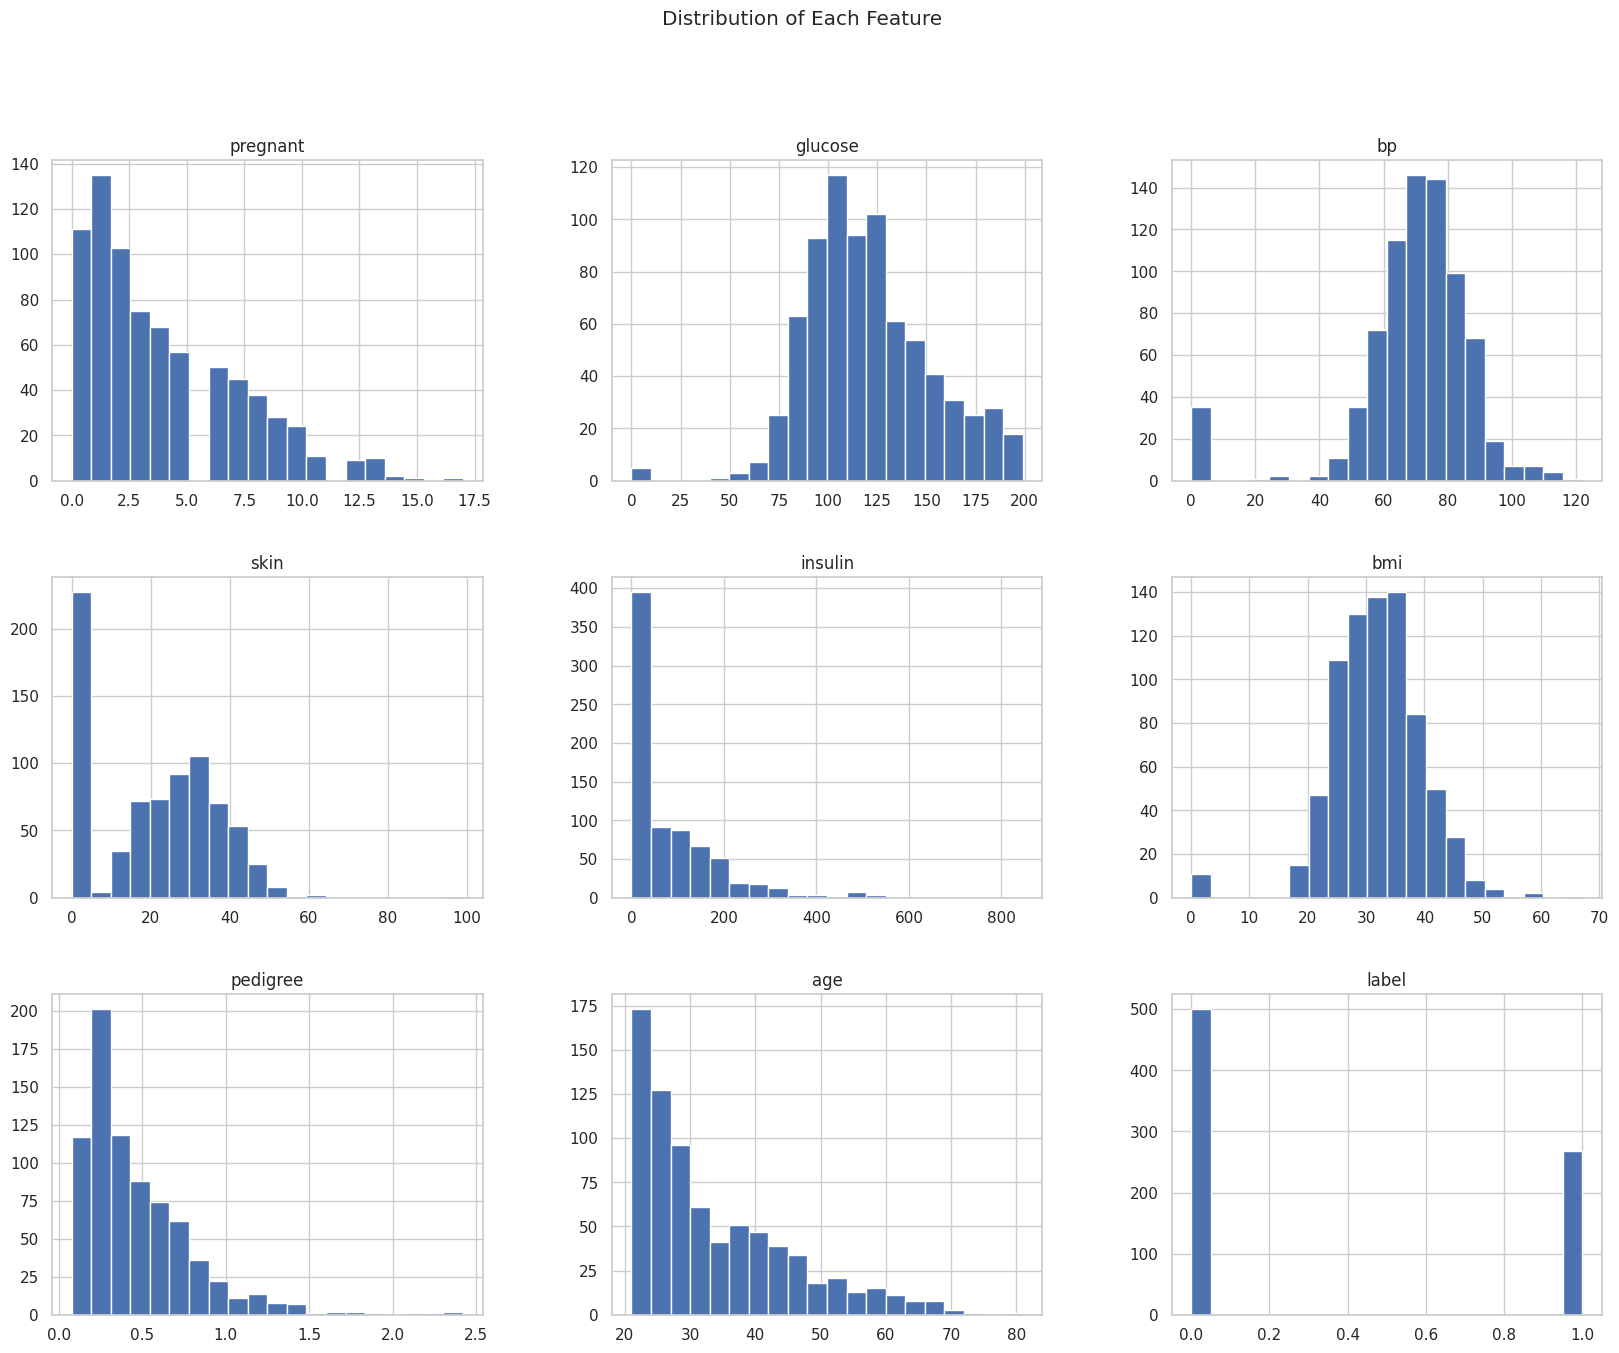

In [9]:
# 1. Distribution of each feature
pima.hist(bins=20, figsize=(20, 15))
plt.suptitle('Distribution of Each Feature')
plt.show()

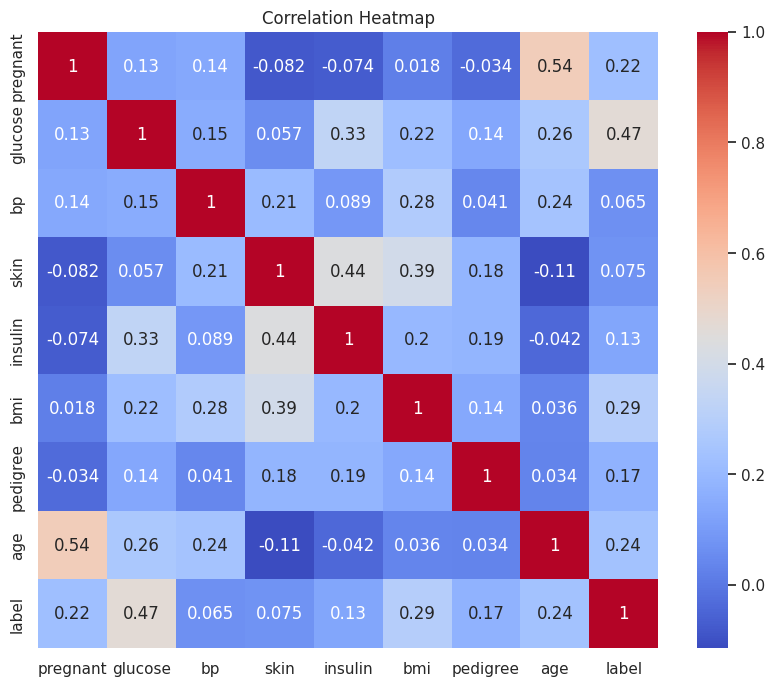

In [12]:
# 2. Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = pima.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

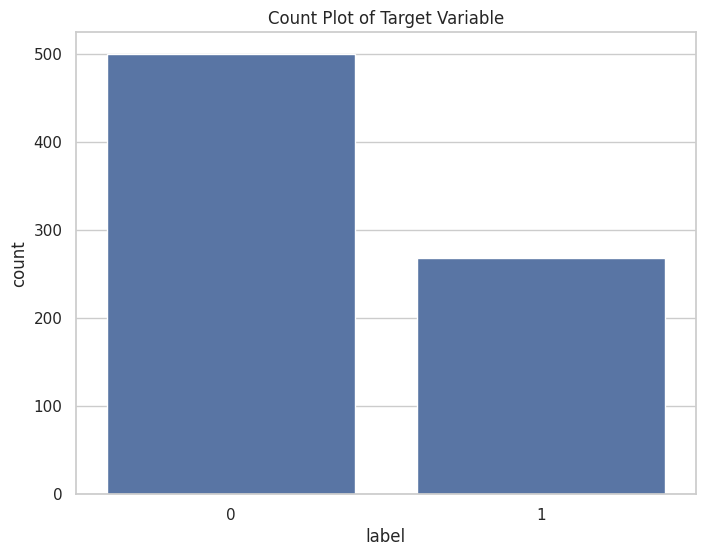

In [13]:
# 3. Count plot of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=pima)
plt.title('Count Plot of Target Variable')
plt.show()

**Feature Selection**

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [14]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [15]:
X.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree
0,6,0,33.6,50,148,72,0.627
1,1,0,26.6,31,85,66,0.351
2,8,0,23.3,32,183,64,0.672
3,1,94,28.1,21,89,66,0.167
4,0,168,43.1,33,137,40,2.288


In [16]:
X.shape

(768, 7)

**Splitting Data**

To understand model performance, dividing the dataset into a training set and a test set is a good strategy. 

Let's split the dataset by using the function train_test_split(). You need to pass three parameters features; target, and test_set size.

In [17]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

**Building Decision Tree Model (Decision Tree)** 

Let's create a decision tree model using Scikit-learn.

In [23]:
# Tune the parameters of the Decision Tree Classifier
dclf = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=10, min_samples_leaf=5)

# Train Decision Tree Classifer
dclf = dclf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_dt = dclf.predict(X_test)

In [30]:
# Tune the parameters of the Random Forest Classifier
rclf = RandomForestClassifier(criterion='gini', max_depth=8, max_features='log2', n_estimators=100, min_samples_split=10, min_samples_leaf=5)

# Train Random Forest Classifier
rclf = rclf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_rm = rclf.predict(X_test)

**Evaluating the Model**

Let's estimate how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [31]:
# Model Accuracy, how often is the classifier correct? 
print("Decision T Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Random F Accuracy:",metrics.accuracy_score(y_test, y_pred_rm))

Decision T Accuracy: 0.7922077922077922
Random F Accuracy: 0.8051948051948052


In [32]:
# Basic score
dt_score = dclf.score(X_test, y_test)
rf_score = rclf.score(X_test, y_test)
print(f'Decision T Basic score: {dt_score}')
print(f'Random F Basic score: {rf_score}')

Decision T Basic score: 0.7922077922077922
Random F Basic score: 0.8051948051948052


In [33]:
# print classification report
print(classification_report(y_test, y_pred_dt))
print('-'*60)
print(classification_report(y_test, y_pred_rm))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       146
           1       0.73      0.69      0.71        85

    accuracy                           0.79       231
   macro avg       0.78      0.77      0.77       231
weighted avg       0.79      0.79      0.79       231

------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       146
           1       0.80      0.62      0.70        85

    accuracy                           0.81       231
   macro avg       0.80      0.77      0.78       231
weighted avg       0.80      0.81      0.80       231



We got a classification rate of **78.85%** for Decision Tree Classifier while **80.95%** for Random Forest Classifier which is considered as good accuracy. You can improve this accuracy by tuning the parameters in the decision tree and random forest algorithm

**Visualizing Decision Trees**

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting the tree, you also need to install graphviz and pydotplus.

In [ ]:
%pip install graphviz
%pip install pydotplus

The export_graphviz function converts the decision tree classifier into a dot file, and pydotplus converts this dot file to png or displayable form on Jupyter

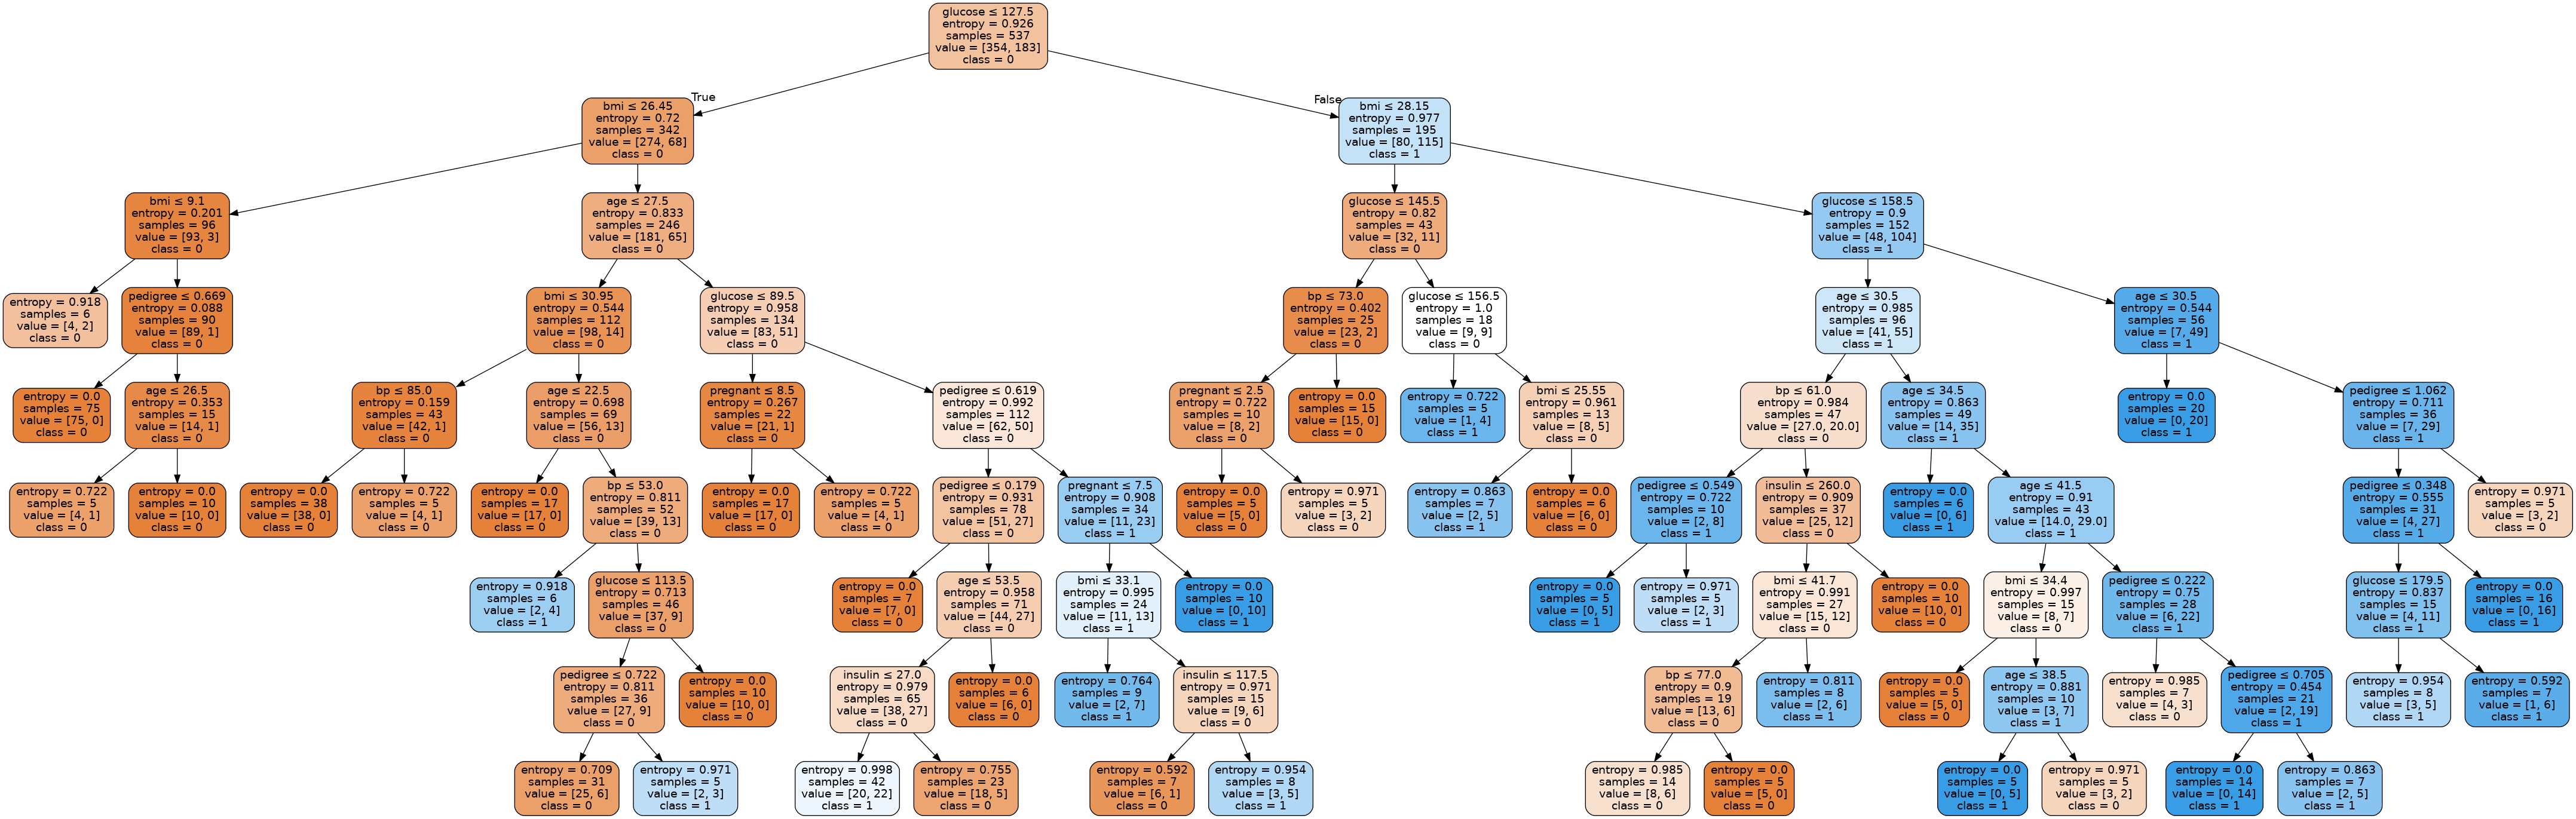

In [101]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dclf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [102]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [117]:
# Example data for prediction
new_data = pd.DataFrame([{
    'pregnant': 2,
    'insulin': 130,
    'bmi': 28.1,
    'age': 45,
    'glucose': 150,
    'bp': 70,
    'pedigree': 0.5
}])

# Make prediction
dt_prediction = dclf.predict(new_data)
print("Decision T Prediction:", dt_prediction)

rm_prediction = rclf.predict(new_data)
print("Random F Prediction:", rm_prediction)

Decision T Prediction: [1]
Decision T Prediction: [1]
